In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [12]:
%matplotlib notebook

In [19]:
L = 1
T = 3000
dT = 2
Nx = 500
a = 0.0000001

In [46]:
x = np.linspace(0, L, Nx+1)    # mesh points in space
dx = x[1] - x[0]
t = np.arange(0, T, dT)    # mesh points in time
Nt = len(t)
F = a*dT/dx**2
u   = np.zeros(Nx+1)           # unknown u at new time level
u_1 = np.zeros(Nx+1) 
du = np.zeros(Nx+1)
Z2tot = np.zeros((Nx, Nt))

In [47]:
def odefunc(u, t):
    for n in range(0, Nt):
        du = np.zeros(Nx+1)
    # Compute u at inner mesh points
        for i in range(1, Nx):
            du[0]=F*(u_1[Nx] - 2*u_1[0] + u_1[1])
            du[i] = F*(u_1[i-1] - 2*u_1[i] + u_1[i+1])
            du[Nx]=F*(u_1[Nx-1] - 2*u_1[Nx] + u_1[0])
            for i in range(0, Nx+1):
                u_1[i] = u_1[i] + du[i]
       
        Z = np.diff(u_1)/dx
        Z2 = Z*Z
        Z2tot[:,n]=Z2

    return du, Z2tot


In [49]:
du, Z2tot = odefunc(u, t)
sol = odeint(du, u_1, Nt)
print(sol)

error: The function and its Jacobian must be callable functions.

<IPython.core.display.Javascript object>


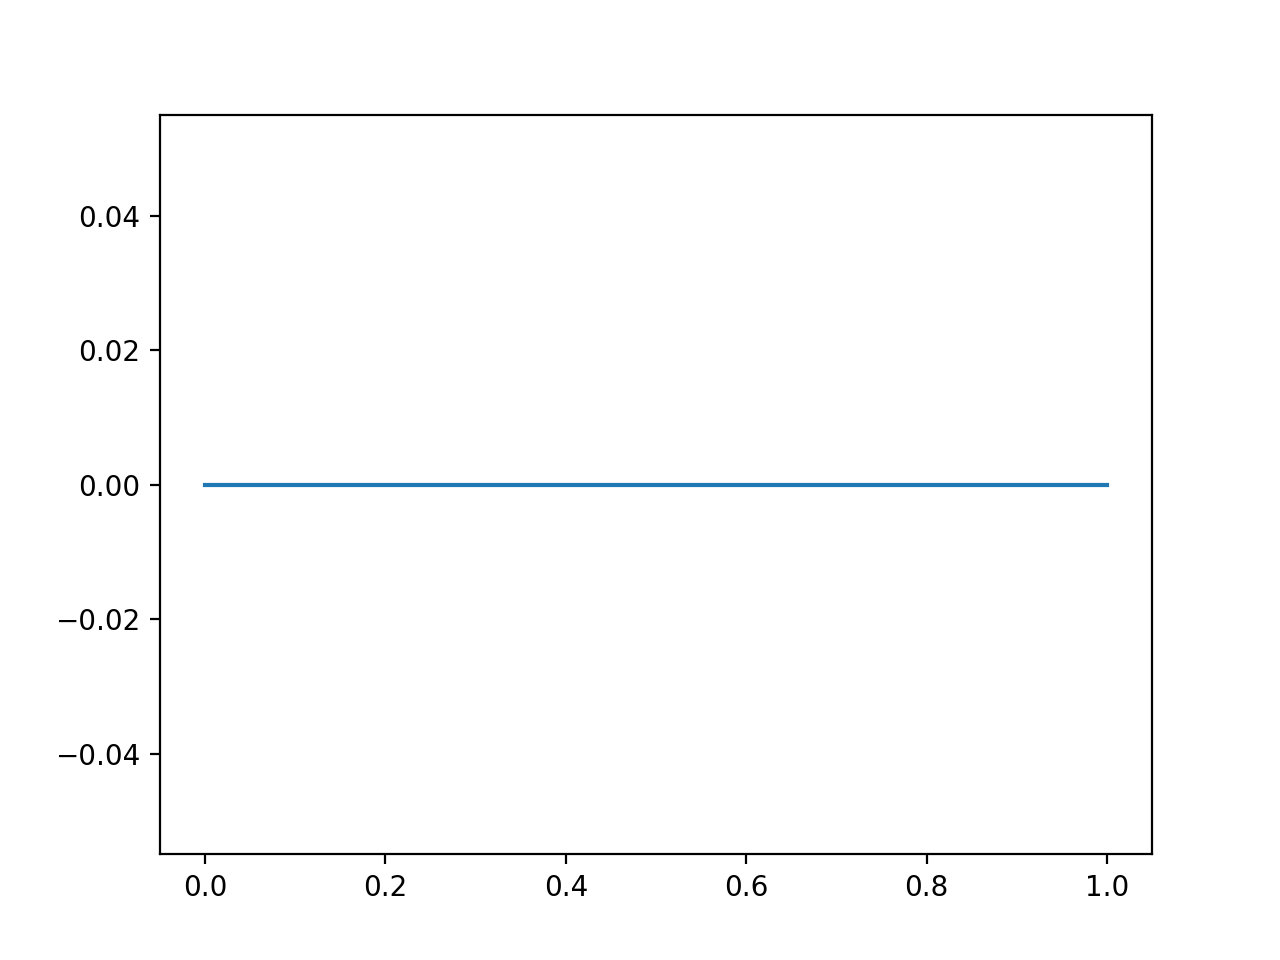

In [23]:
plt.figure()
plt.plot(x, sol[0,:])

<IPython.core.display.Javascript object>


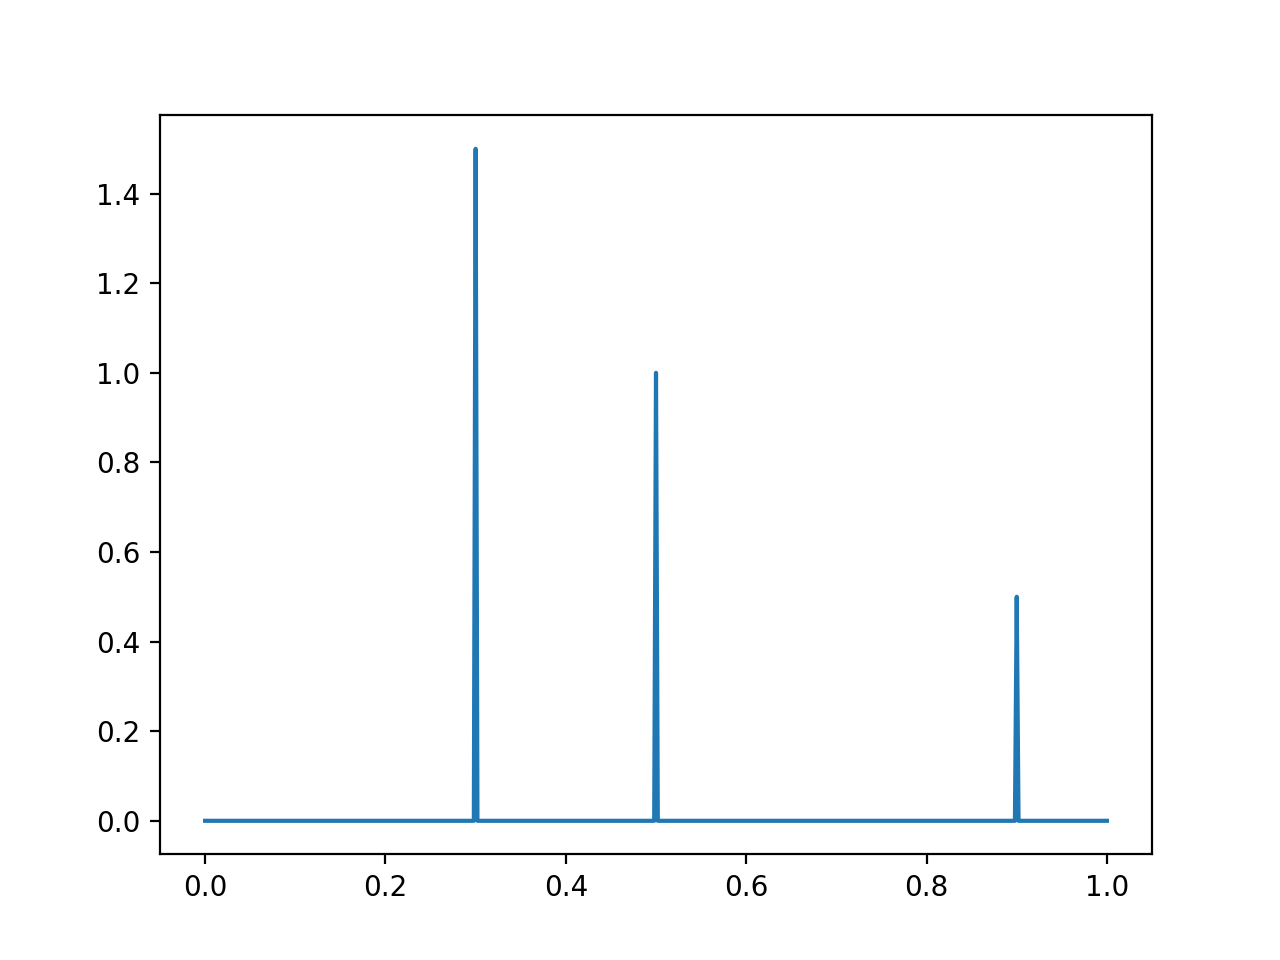

In [18]:
u_1 = sol[0,:]
u_1[450]+=0.5
u_1[150]+=1.5
u_1[250]+=1
plt.figure()
plt.plot(x, u_1)